# Продвинутый Python, семинар 3

**Лектор:** Петров Тимур

**Семинаристы:** Петров Тимур, Бузаев Федор, Дешеулин Олег, Коган Александра

**Spoiler Alert:** в рамках курса нельзя изучить ни одну из тем от и до досконально (к сожалению, на это требуется больше времени, чем даже 3 часа в неделю). Но мы попробуем рассказать столько, сколько возможно :)

Думая о том, где можно было бы хорошо попрактиковать анализ данных, меня вдруг осенило, что одно из явных приложений - это аналитика игр

Никакая успешная команда, выступающая на чемпионатах (будь то The International в Dota2 или же Worlds в LoL), всегда должна иметь аналитика, который будет анализировать игры и на их основе находить инсайты по тому, какую композицию выбрать или же различные синергии.

Поэтому мы будем анализировать игру, которая очень нравится самому лектору - TFT (TeamFight Tactics). Это автобаттлер, в котором ты размещаешь фигурки, апгейдишь их, кладешь итемы и так далее.

![TFT](https://genapilot.ru/wp-content/uploads/2020/03/teamfight-tactics-vyhodit-na-mobilnyh-ustrojstvah-s-ios-i-android.jpg)

Поэтому попрактикуемся на базовом датасете: [тык](https://www.kaggle.com/datasets/pvillanueva13/tft-35-500-gm-matches?select=tft_3.5_last_500_gm_match_info.csv)

## Грузим данные и библиотеки

In [ ]:
!pip install python-dateutil

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.parser import parse
import dateutil
import pytz
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/Palladain/Deep_Python/raw/main/Seminars/Seminar_2/archive.zip

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: items.json              
  inflating: tft_3.5_last_500_gm_match_info.csv  
  inflating: tft_3.5_last_500_gm_unit_info.csv  
  inflating: traits.json             


## Что у нас есть?

Наши данные - это информация о матчах игроков и фигурках, которые были поставлены.

А также jsonы с информацией про предметы и особенности

## Задание 1

Загрузите данные и посмотрите на 5 рандомных строк и посмотрите информацию про каждый из датасетов

In [ ]:
matches = pd.read_csv('tft_3.5_last_500_gm_match_info.csv')
matches.sample(5)

,match_id,puuid,challenger,galaxy,placement,game_datetime,Astro,Chrono,DarkStar,Set3_Celestial,...,Starship,Demolitionist,Mercenary,Set3_Blademaster,Paragon,Protector,Set3_Sorcerer,StarGuardian,MechPilot,SpacePirate
3386,NA1_3575311548,cPtJTXuujg3ZZpYsRZO3TobiCvQ4dj4VSkErTZar59x-uQ...,0,Normal Game,3,2020-09-14 23:21:15,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1064,NA1_3570884385,3egxpgxkg8mYC8EWqe4hO5hwlR1atrd8W19s_BtU-xPS4J...,0,Trade Sector,1,2020-09-11 11:23:19,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2216,NA1_3573122309,lga-iGnkuk2zbkbOFhrQM4kXRLD_0DwdNek5yzobNafyIb...,0,Superdense Galaxy,1,2020-09-13 04:25:08,0,0,0,0,...,0,0,0,0,1,1,2,2,0,0
1623,NA1_3572005327,yCFDG5ApscuUemQ399_UGEIkApyOPEBlO0MirkdU55pv5d...,0,Plunder Planet,8,2020-09-12 06:07:46,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
3528,NA1_3575502886,eZQHaAM5cJOMhj-6dCB9eHvf8H4e4l6ji-1-DthyRDfT70...,1,Trade Sector,1,2020-09-15 02:41:25,0,0,0,1,...,0,0,0,0,1,1,2,2,0,0


In [ ]:
heroes = pd.read_csv('tft_3.5_last_500_gm_unit_info.csv')
heroes.sample(5)

,match_id,puuid,champion,tier,item_set_1,item_set_2,item_set_3,traits_1,traits_2,traits_3
34705,NA1_3569559117,n0ntoKURrUZ4h6M7I9LHpoQAuz3gMIiJ6_VaGhpAntZqEz...,Neeko,2,27.0,55.0,79.0,Star Guardian,Protector,NaN
20828,NA1_3572009163,KmrUmebiN3TKxZWJ5vv0I2I7Tmxv-EMkX4YqafUnSBxDsX...,Yasuo,2,46.0,NaN,NaN,Rebel,Blademaster,NaN
746,NA1_3576292366,Ig6DxrB4gGb2R_wkpkj1IuPArWI4TVDjW6VM9it7qlh45j...,Lulu,2,67.0,NaN,NaN,Celestial,Mystic,NaN
15921,NA1_3572956605,MKM6jJQM27BxVswYZORD0wzgeUOLPvAOryElRPytx1Iy_d...,Vi,1,8.0,NaN,NaN,Cybernetic,Brawler,NaN
21921,NA1_3571626275,tGK_uOKYzBQwX51d41Gy5WFTYwWndIUIB04NzlxA72RBdi...,Ahri,2,NaN,NaN,NaN,Star Guardian,Sorcerer,NaN


In [ ]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35084 entries, 0 to 35083
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   match_id    35084 non-null  object 
 1   puuid       35084 non-null  object 
 2   champion    35084 non-null  object 
 3   tier        35084 non-null  int64  
 4   item_set_1  20029 non-null  float64
 5   item_set_2  12086 non-null  float64
 6   item_set_3  7846 non-null   float64
 7   traits_1    35084 non-null  object 
 8   traits_2    35084 non-null  object 
 9   traits_3    1723 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.7+ MB


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          4000 non-null   object
 1   puuid             4000 non-null   object
 2   challenger        4000 non-null   int64 
 3   galaxy            4000 non-null   object
 4   placement         4000 non-null   int64 
 5   game_datetime     4000 non-null   object
 6   Astro             4000 non-null   int64 
 7   Chrono            4000 non-null   int64 
 8   DarkStar          4000 non-null   int64 
 9   Set3_Celestial    4000 non-null   int64 
 10  Set3_Mystic       4000 non-null   int64 
 11  Sniper            4000 non-null   int64 
 12  Vanguard          4000 non-null   int64 
 13  Cybernetic        4000 non-null   int64 
 14  Infiltrator       4000 non-null   int64 
 15  ManaReaver        4000 non-null   int64 
 16  Battlecast        4000 non-null   int64 
 17  Blaster       

## Задание 2

Посчитайте число строк в датасете matches и посмотрите на число уникальных puuid и match_id в датасете с матчами.

Сделайте вывод, сколько было матчей и сколько игроков играло. Среди игроков выделите число challengers (подсказка - поле challenger)

In [ ]:
print("Rows in dataset:", len(matches))
print("Unique players:", len(matches.puuid.unique()))
print("Unique matches:", len(matches.match_id.unique()))
print("Challengers:", len(matches[matches.challenger == 1].puuid.unique()))

Rows in dataset: 4000
Unique players: 787
Unique matches: 500
Challengers: 83


## Задание 3

Уберите из названий колонок для датасета matches все подстроки "Set3_" (подсказка: функция rename())

In [ ]:
matches = matches.rename(lambda x: x.replace("Set3_", ""), axis='columns')
matches.columns

Index(['match_id', 'puuid', 'challenger', 'galaxy', 'placement',
       'game_datetime', 'Astro', 'Chrono', 'DarkStar', 'Celestial', 'Mystic',
       'Sniper', 'Vanguard', 'Cybernetic', 'Infiltrator', 'ManaReaver',
       'Battlecast', 'Blaster', 'Brawler', 'Rebel', 'Starship',
       'Demolitionist', 'Mercenary', 'Blademaster', 'Paragon', 'Protector',
       'Sorcerer', 'StarGuardian', 'MechPilot', 'SpacePirate'],
      dtype='object')

## Задание 4

Посмотрите, сколько участников было в каждом матче

In [ ]:
print("Participants in 1 match:", matches.groupby(['match_id']).agg({"puuid": "nunique"}).sort_values("puuid").puuid.unique()[0])

8

## Задание 5

Создайте колонку winner, где 1-4 место - это победа, а 5-8 - проигрыш

А также создайте колонку galaxy_numb, где каждой галактике будет присвоен свой собственный номер (подсказка: функция factorize())

И после этого посмотреть на распределение мест у challengers и распределение галактик в играх

In [ ]:
matches["winner"] = (matches.placement <= 4).astype("int")
matches['galaxy_numb'] = pd.factorize(matches.galaxy)[0]
matches.sample(5)

,match_id,puuid,challenger,galaxy,placement,game_datetime,Astro,Chrono,DarkStar,Celestial,...,Mercenary,Blademaster,Paragon,Protector,Sorcerer,StarGuardian,MechPilot,SpacePirate,winner,galaxy_numb
2507,NA1_3573509894,rx3PIvsslyPV_00HkBtGCCP2blJcLx1Pc_Gh0IWGd5x6K6...,0,Superdense Galaxy,4,2020-09-13 13:46:52,0,0,0,1,...,0,0,0,1,2,2,0,0,1,6
1825,NA1_3572306499,lUwYwR9xpXaR8HkZ-7FYDiTf0r15X04-wiS8NmdjwcFDoP...,0,Galactic Armory,2,2020-09-12 12:05:26,1,1,0,1,...,0,0,0,0,0,0,0,0,1,8
2139,NA1_3572678616,8ruhY_tmLGV32cLpsbgl7vgCF-00c_uk7WvschD32vkcVT...,0,Normal Game,4,2020-09-12 22:47:29,0,0,0,1,...,0,0,0,1,2,1,0,0,1,4
1624,NA1_3571988109,DPt4Q0BM7m1uMRk9Bien9OrEZgc5MpkMRQcf2L1cnCACYI...,0,Plunder Planet,1,2020-09-12 06:22:24,0,1,0,0,...,0,0,0,0,0,0,0,0,1,5
1320,NA1_3571233234,rFLN319YJUHDfIndhPw9vqbB8PW6tVFZ1BryqnbA8_OFY0...,0,Plunder Planet,1,2020-09-11 21:33:58,0,1,0,0,...,1,1,0,0,0,0,0,0,1,5


In [ ]:
matches[matches.challenger == 1].winner.describe()

count    750.000000
mean       0.681333
std        0.466270
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: winner, dtype: float64

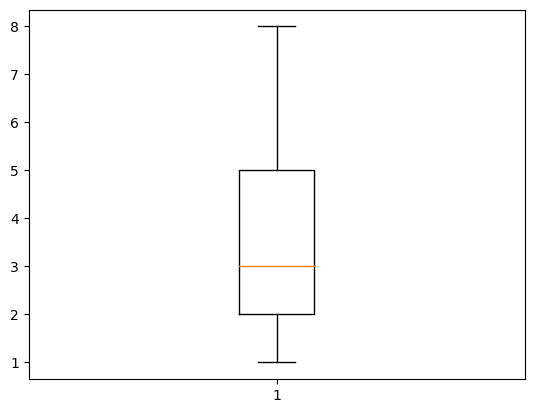

In [ ]:
plt.boxplot(matches[matches.challenger == 1].placement)
plt.show()

## Datetime

Чтобы решать задачи со временем, можно было бы просто вычленить из строки нужное поле и жить спокойно. Но вот, допустим, что вы хотите посмотреть не только час, но и минута, день, месяц, год и так далее. А еще у вас там часовой пояс есть какой-нибудь.

Выглядит не очень. Вот ровно для такого и существует библиотека datetime! С ее помощью можно достать из строки дату и время, преобразовать ее, привести к общему часовому поясу, посчитать разницу во времени и так далее

[Документация](https://docs.python.org/3/library/datetime.html)

Есть еще полезная надстройка над datetime - dateutil, которая в некоторых моментах позволяет более удобно работать со временем и его преобразованием

[Документация](https://dateutil.readthedocs.io/en/stable/index.html)

Какие функции есть у datetime? Начнем с преобразований из строк

* datetime.fromisoformat(s) - работает, если у вас формат выглядит как

```
YYYY-MM-DD[*HH[:MM[:SS[.fff[fff]]]][+HH:MM[:SS[.ffffff]]]]
YYY-MM-DD - год-месяц-день
HH:MM:SS - часы-минуты-секунды (может быть еще после точки миллисекунды)
+HH::MM:SS - часовой пояс не через название
```

* datetime.strptime(s, format) - по заданному шаблону преобразовать в datetime (однако тут надо задать правильный шаблон)

Форматы:

```
%a  Locale’s abbreviated weekday name.
%A  Locale’s full weekday name.      
%b  Locale’s abbreviated month name.     
%B  Locale’s full month name.
%c  Locale’s appropriate date and time representation.   
%d  Day of the month as a decimal number [01,31].    
%f  Microsecond as a decimal number [0,999999], zero-padded on the left
%H  Hour (24-hour clock) as a decimal number [00,23].    
%I  Hour (12-hour clock) as a decimal number [01,12].    
%j  Day of the year as a decimal number [001,366].   
%m  Month as a decimal number [01,12].   
%M  Minute as a decimal number [00,59].      
%p  Locale’s equivalent of either AM or PM.
%S  Second as a decimal number [00,61].
%U  Week number of the year (Sunday as the first day of the week)
%w  Weekday as a decimal number [0(Sunday),6].   
%W  Week number of the year (Monday as the first day of the week)
%x  Locale’s appropriate date representation.    
%X  Locale’s appropriate time representation.    
%y  Year without century as a decimal number [00,99].    
%Y  Year with century as a decimal number.   
%z  UTC offset in the form +HHMM or -HHMM.
%Z  Time zone name (empty string if the object is naive).    
%%  A literal '%' character.
```

* dateutil.parser.parse(s) - спарсить в datetime (без лишних заморочек с форматом)

In [ ]:
d = '2022-04-26T15:14:32.001+03:00'

dt.datetime.fromisoformat(d)

datetime.datetime(2022, 4, 26, 15, 14, 32, 1000, tzinfo=datetime.timezone(datetime.timedelta(seconds=10800)))

In [ ]:
from dateutil.parser import parse
#А теперь поменяем: DD-MM-YYYY
d = '05-04-2022 15:14:32.001GMT'
format = '%d-%m-%Y %H:%M:%S.%f%Z'

dt.datetime.strptime(d, format)

datetime.datetime(2022, 4, 5, 15, 14, 32, 1000)

In [ ]:
print(parse(d, dayfirst=True)) #Только здесь надо было указать, что день идет первее, чем месяц

tzinfos = {'MSK': 10800}
d = 'Sat Oct 11 17:13:46 MSK 2003'
print(parse(d, tzinfos=tzinfos)) # И даже так он умеет, но надо задавать все нужные вам таймзоны

2003-10-11 17:13:46+03:00


In [ ]:
dt.datetime.fromtimestamp(17456034) #можно вытаскивать также и с timestamp время

datetime.datetime(1970, 7, 22, 0, 53, 54)

Мы получили инстанс в виде datetime, из которого можно спокойно вытащить примерно все:

In [ ]:
parse(d, tzinfos=tzinfos)

datetime.datetime(2003, 10, 11, 17, 13, 46, tzinfo=tzoffset('MSK', 10800))

In [ ]:
d = parse(d, tzinfos=tzinfos)
print(d.year, d.month, d.day, d.hour, d.minute, d.second, d.tzinfo)

2003 10 11 17 13 46 tzoffset('MSK', 10800)


Окей, теперь хотим избавиться от тайм-зоны (или привести к какой-нибудь другой зоне, скажем, МСК подойдет)

In [ ]:
d = d.astimezone(pytz.timezone('UTC'))
print(d)
d = d.astimezone(pytz.timezone('Europe/Moscow'))
print(d)

2003-10-11 14:13:46+00:00
2003-10-11 18:13:46+04:00


In [ ]:
#Вывести все возможные таймзоны
for tz in pytz.all_timezones:
    print(tz)

В чем проблема с таймзонами? В том, что с ними в целом сложно (вот у нас был переход на зимнее/летнее время, теперь нет, а потом опять ввели, а потом опять нет)

Поэтому такие косяки бывают всегда, но нам для точности достаточно хотя бы привести все к единому времени (так у нас данные не будут расходиться по часовым поясам)

Хорошо, привели все времена. Хотим теперь, наверное, считать diff между временами? Легко!

In [ ]:
dt_1 = dt.datetime(2022, 5, 6, 14, 15, 16)
print(dt_1)
dt_2 = dt.datetime.now() #Дает время в UTC
print(dt_2)

2022-05-06 14:15:16
2022-09-14 22:50:31.705200


In [ ]:
dt_2 - dt_1 #Получаем объект типа timedelta

datetime.timedelta(days=131, seconds=30915, microseconds=705200)

In [ ]:
diff = dt_2 - dt_1
diff.days #хопа, разница в днях

131

In [ ]:
dt_2 + dt.timedelta(days=15) #Хотим узнать, какое число будет через 15 дней

datetime.datetime(2022, 9, 29, 22, 50, 31, 705200)

In [ ]:
format = '%d-%m-%Y'
dt.datetime.strftime(dt_2 + dt.timedelta(days=15), format) #и красивый вывод по шаблону

'29-09-2022'

А теперь к заданию!

## Задание 6.

Понять, в какие часы и дни играют challengers и выигрывают чаще. Для этого нужно создать поля days и hours с помощью datetime :)

In [ ]:
matches.game_datetime = matches.game_datetime.apply(lambda x: parse(x)) # делаем через apply
matches.head(5)

,match_id,puuid,challenger,galaxy,placement,game_datetime,Astro,Chrono,DarkStar,Celestial,...,Mercenary,Blademaster,Paragon,Protector,Sorcerer,StarGuardian,MechPilot,SpacePirate,winner,galaxy_numb
0,NA1_3569517250,7AKHCtexkJJo8p04lg4shtx7n7R-uH6pQwPhBCEofkIJca...,0,Treasure Trove,1,2020-09-10 05:18:02,0,0,3,2,...,0,0,0,1,0,0,0,0,1,0
1,NA1_3569517250,0StQeXmDacsAikvEcY2ubarDZqzlEsaYsZHO6UT-UgBFY7...,0,Treasure Trove,2,2020-09-10 05:18:02,0,0,0,0,...,0,0,1,1,2,2,0,0,1,0
2,NA1_3569517250,Y0emdKI096n9-Rb0L4_I4pP_tmn_kwCtKiEjIsBRrxRqX_...,1,Treasure Trove,3,2020-09-10 05:18:02,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,NA1_3569517250,1vCCOdxLrdYa6NQRhywKKdZ0UNdX0nsa15Zpqo03k6QFs6...,1,Treasure Trove,4,2020-09-10 05:18:02,0,0,1,0,...,0,0,1,1,2,1,0,0,1,0
4,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,0,Treasure Trove,5,2020-09-10 05:18:02,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
matches['hour'] = matches.game_datetime.apply(lambda x: x.hour)
matches['day'] = matches.game_datetime.apply(lambda x: x.day)

In [ ]:
matches[matches.challenger == 1].groupby("hour").agg({"winner": "mean"}).reset_index().sort_values("winner", ascending=False).head(5)
matches[matches.challenger == 1].groupby("day").agg({"winner": "mean"}).reset_index().sort_values("winner", ascending=False).head(5)

,day,winner
5,15,0.750000
1,11,0.709220
3,13,0.705882
6,16,0.666667
4,14,0.653061


## Задание 7.

Сджойнить таблицы с героями и матчами и выбрать самого лучшего чемпиона (самое больше число побед)

In [ ]:
merged_matches = pd.merge(matches, heroes, on=['match_id', 'puuid'], how='inner') #делаем merge
merged_matches.sample(5)

,match_id,puuid,challenger,galaxy,placement,game_datetime,Astro,Chrono,DarkStar,Celestial,...,hour,day,champion,tier,item_set_1,item_set_2,item_set_3,traits_1,traits_2,traits_3
29399,NA1_3575188739,JqgBQJuyGAaArodABn3IAROW7ooGnRG8kPiQFGhpcWkehx...,0,Plunder Planet,2,2020-09-14 22:40:59,0,0,0,0,...,22,14,Xerath,2,16.0,66.0,NaN,Dark Star,Sorcerer,NaN
9142,NA1_3570892349,CfXUigm-TJVFnsrur4dgEWRgC-nCwPs7BJnkAilrBY0X9g...,1,Trade Sector,2,2020-09-11 10:58:07,0,1,0,1,...,10,11,Fiora,3,NaN,NaN,NaN,Cybernetic,Blademaster,NaN
18767,NA1_3572742240,iF9DVCVJdFmCAQrwqp3q747p9rWqUAWSOFZA_9rGbAn4cP...,0,Trade Sector,4,2020-09-12 23:13:56,0,1,0,0,...,23,12,Nocturne,2,NaN,NaN,NaN,Battlecast,Infiltrator,NaN
22006,NA1_3573520683,BHwWIvOdCEsud-jyH9jOBD8LN-P43D3e7rEuv3e7B91tgN...,1,Galactic Armory,1,2020-09-13 14:01:07,0,0,3,1,...,14,13,Wukong,2,NaN,NaN,NaN,Chrono,Vanguard,NaN
13529,NA1_3571744152,TPjqZ6bdAZ3caUh66qKxosVN2W89QseafTgl88tJswSds9...,0,Plunder Planet,7,2020-09-12 04:22:01,0,0,0,0,...,4,12,Annie,2,NaN,NaN,NaN,Mech-Pilot,Sorcerer,NaN


In [ ]:
merged_matches.groupby("champion").agg({"winner": "mean"}).reset_index().sort_values("winner", ascending=False).head(5)

,champion,winner
45,Urgot,0.692008
51,Xerath,0.671458
43,Thresh,0.653930
27,Lulu,0.650273
9,Ekko,0.635000


## Задание 8.

Поменяйте в таблице с героями все Nan на 0, а затем посчитайте и добавьте индекс "полезности" сборки (индекс будем считать как скалярное произведение id итемов на столбец [2, 1, 0] (то есть первый предмет самый нужный, затем второй и только после третий)

Добавьте колонку "coef" в датасет

In [ ]:
heroes = heroes.fillna(0) # заменить все Nan на значение (в данном случае 0)
res_1 = np.array(heroes[["item_set_1", "item_set_2", "item_set_3"]]) # Сделали табличку для перемножения
coefs = np.arange(2, -1, -1).reshape(-1, 1) # получили коэффициенты
heroes["coef"] = np.dot(res_1, coefs)
heroes

,match_id,puuid,champion,tier,item_set_1,item_set_2,item_set_3,traits_1,traits_2,traits_3,coef
0,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Caitlyn,1,68.0,88.0,0.0,Chrono,Sniper,0,224.0
1,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Nautilus,2,27.0,59.0,0.0,Astro,Vanguard,0,113.0
2,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Ashe,2,26.0,0.0,0.0,Celestial,Sniper,0,52.0
3,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Karma,2,46.0,0.0,0.0,Dark Star,Mystic,0,92.0
4,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Soraka,2,0.0,0.0,0.0,Star Guardian,Mystic,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35079,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,Aurelion Sol,2,12.0,37.0,13.0,Rebel,Starship,0,61.0
35080,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,Ekko,1,24.0,0.0,0.0,Cybernetic,Infiltrator,0,48.0
35081,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,Lulu,2,0.0,0.0,0.0,Celestial,Mystic,0,0.0
35082,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,Urgot,2,44.0,69.0,14.0,Battlecast,Protector,0,157.0


In [ ]:
# Можно также сделать с помощью apply (да, его можно делать не только для 1 столбца)

def f(x):
    return x[0] * 2 + x[1]

heroes["coef"] = heroes[["item_set_1", "item_set_2", "item_set_3"]].apply(lambda x: f(x), axis=1)
# задаем, что идем по строкам, получаем массив из 3 элементов

In [ ]:
heroes

,match_id,puuid,champion,tier,item_set_1,item_set_2,item_set_3,traits_1,traits_2,traits_3,coef
0,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Caitlyn,1,68.0,88.0,0.0,Chrono,Sniper,0,224.0
1,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Nautilus,2,27.0,59.0,0.0,Astro,Vanguard,0,113.0
2,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Ashe,2,26.0,0.0,0.0,Celestial,Sniper,0,52.0
3,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Karma,2,46.0,0.0,0.0,Dark Star,Mystic,0,92.0
4,NA1_3576421406,E9vhtL_T6i81fD7EmWshNbUUNuf_gstpkSUI17IcbLW43e...,Soraka,2,0.0,0.0,0.0,Star Guardian,Mystic,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35079,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,Aurelion Sol,2,12.0,37.0,13.0,Rebel,Starship,0,61.0
35080,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,Ekko,1,24.0,0.0,0.0,Cybernetic,Infiltrator,0,48.0
35081,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,Lulu,2,0.0,0.0,0.0,Celestial,Mystic,0,0.0
35082,NA1_3569517250,mC0hMfKYhejc1U1aJE7iTOTn6TUDkY4apfQhdw2Pvp_jV3...,Urgot,2,44.0,69.0,14.0,Battlecast,Protector,0,157.0


## Задание 9.

Посчитать, какие итемы чаще всего используют и как они называются

Иногда для того, чтобы выгрузить данные, вам надо будет подгружать json-файлы. Делается это с помощью библиотеки json

[Документация](https://docs.python.org/3/library/json.html)

Базово, для того, чтобы выгрузить json, нужно использовать load (когда грузим из файла) или loads (если хотим выгрузить из строки)

In [ ]:
import json

with open('items.json') as json_data:
    items = json.load(json_data)
items = pd.DataFrame(items) # А дальше можно просто запихнуть это в DataFrame, очень удобно!

In [ ]:
res = np.unique(np.array(heroes[["item_set_1", "item_set_2", "item_set_3"]]).ravel(), return_counts=True)
# В unique есть аргумент return_counts, который вам дает еще и подсчет уникальных значений!

count_items = pd.DataFrame(res)
count_items = count_items.T #умеем прям как в numpy!
count_items.columns = ["id", "cnt"]
count_items

In [ ]:
pd.merge(items, count_items, on=['id'], how='inner').sort_values("cnt", ascending=False).head(5)

,id,name,cnt
13,15,Guardian Angel,2447.0
10,12,Giant Slayer,2041.0
33,44,Seraph's Embrace,1889.0
45,67,Zephyr,1464.0
30,37,Morellonomicon,1403.0


## Задание 10

Запишите получившийся результат для матчей в matches_new.csv. В файле должны быть только колонки с целочисленными данными

In [ ]:
matches.select_dtypes(include=['int']).to_csv("matches_new.csv")